In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("C:\\Users\\Pratham Chauhan\\fortnite.csv")


In [28]:
data

,Solo kd,Solo winRatio,Duos kd,Duos winRatio,Trios kd,Trios winRatio,Squads kd,Squads winRatio,LTM kd,LTM winRatio,label
0,4.37,18.0,10.71,45.7,6.65,31.2,6.88,31.7,118,5.78,1
1,8.71,29.1,9.49,21.5,8.06,19.0,10.24,30.3,190,8.20,0
2,9.60,34.0,7.78,24.6,4.75,26.4,8.40,32.9,818,11.12,1
3,0.84,3.3,1.02,9.2,1.14,8.6,0.87,4.1,246,2.33,0
4,6.32,30.0,11.13,50.6,24.07,78.5,7.58,36.2,600,14.99,0
...,...,...,...,...,...,...,...,...,...,...,...
144,0.73,1.8,0.13,1.3,2.90,3.6,0.26,1.2,1,0.26,0
145,1.01,2.4,0.94,4.4,0.62,1.5,0.99,2.2,71,2.48,1
146,1.58,4.3,1.90,15.6,1.50,10.6,2.93,15.7,93,3.29,0
147,1.35,1.1,0.50,2.7,0.09,0.0,0.77,0.9,1,0.92,1


In [40]:
# split dataset in features and target variable
feature_cols = ['Solo kd', 'Duos kd', 'Trios kd', 'Squads kd','LTM kd','Solo winRatio']
X = data[feature_cols] # Features
y = data.label # Target variable
X




,Solo kd,Duos kd,Trios kd,Squads kd,LTM kd,Solo winRatio
0,4.37,10.71,6.65,6.88,118,18.0
1,8.71,9.49,8.06,10.24,190,29.1
2,9.60,7.78,4.75,8.40,818,34.0
3,0.84,1.02,1.14,0.87,246,3.3
4,6.32,11.13,24.07,7.58,600,30.0
...,...,...,...,...,...,...
144,0.73,0.13,2.90,0.26,1,1.8
145,1.01,0.94,0.62,0.99,71,2.4
146,1.58,1.90,1.50,2.93,93,4.3
147,1.35,0.50,0.09,0.77,1,1.1


In [41]:
y

0      1
1      0
2      1
3      0
4      0
      ..
144    0
145    1
146    0
147    1
148    0
Name: label, Length: 149, dtype: int64

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
# Train the model using train data and test the model using test data
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

# Model evaluation using confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


C:\Users\RASHMI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[ 8, 13],
       [ 5, 12]], dtype=int64)

In [47]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [48]:
y_test

133    1
109    1
59     0
80     0
7      1
104    1
140    0
95     1
118    0
84     0
33     0
44     1
54     1
24     1
37     0
132    0
111    1
73     1
16     0
45     0
40     1
8      0
85     1
22     1
62     1
94     0
90     0
26     0
43     0
134    0
27     0
97     1
96     0
69     0
18     0
105    1
136    0
61     1
Name: label, dtype: int64

Accuracy: 0.5263157894736842
Precision: 0.48
Recall: 0.7058823529411765


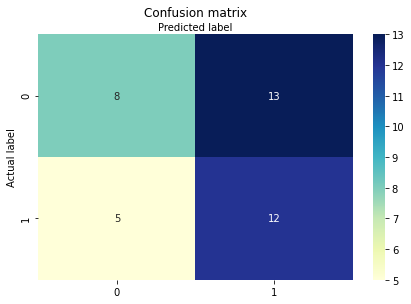

In [49]:
# Visualizing confusion matrix using heatmap
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()	
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
 
# Confusion matrix evaluation metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))